<a href="https://colab.research.google.com/github/THEABHASHARMA/EDAHypothesisTesting/blob/main/campaign_campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("campaign - campaign.csv")

#1. Data Preprocessing

In [4]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,4,6,1,0,0,0,0,0,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,3,7,5,0,0,0,0,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,2,5,2,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,0,2,7,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,1,2,7,1,0,0,0,0,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,2,11,4,0,0,0,0,0,0,US
2235,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,0,3,8,0,0,0,0,0,0,SP
2236,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,1,5,8,0,0,0,0,0,0,SP
2237,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,4,10,3,0,0,0,0,0,0,IND


In [6]:
df.shape

(2239, 27)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2239 non-null   int64 
 1   Year_Birth           2239 non-null   int64 
 2   Education            2239 non-null   object
 3   Marital_Status       2239 non-null   object
 4   Income               2239 non-null   object
 5   Kidhome              2239 non-null   int64 
 6   Teenhome             2239 non-null   int64 
 7   Dt_Customer          2239 non-null   object
 8   Recency              2239 non-null   int64 
 9   MntWines             2239 non-null   int64 
 10  MntFruits            2239 non-null   int64 
 11  MntMeatProducts      2239 non-null   int64 
 12  MntFishProducts      2239 non-null   int64 
 13  MntSweetProducts     2239 non-null   int64 
 14  MntGoldProds         2239 non-null   int64 
 15  NumDealsPurchases    2239 non-null   int64 
 16  NumWeb

In [6]:
df.isnull().sum().sum()

0

#2. Exploratory Data Analysis (EDA)

a) Summary Statistics & Data Distribution

In [8]:
# Summary statistics
summary_stats = df.describe()
summary_stats

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
count,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,...,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000
mean,5590.444841,1968.802144,0.443948,0.506476,49.121036,304.067441,26.307727,167.016525,37.538633,27.074587,...,4.085306,2.662796,5.791425,5.316213,0.072800,0.074587,0.072800,0.064314,0.013399,0.009379
std,3246.372471,11.985494,0.538390,0.544555,28.963662,336.614830,39.781468,225.743829,54.637617,41.286043,...,2.779240,2.923542,3.251149,2.427144,0.259867,0.262782,0.259867,0.245367,0.115001,0.096412
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2827.500000,1959.000000,0.000000,0.000000,24.000000,24.000000,1.000000,16.000000,3.000000,1.000000,...,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5455.000000,1970.000000,0.000000,0.000000,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,...,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8423.500000,1977.000000,1.000000,1.000000,74.000000,504.500000,33.000000,232.000000,50.000000,33.000000,...,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


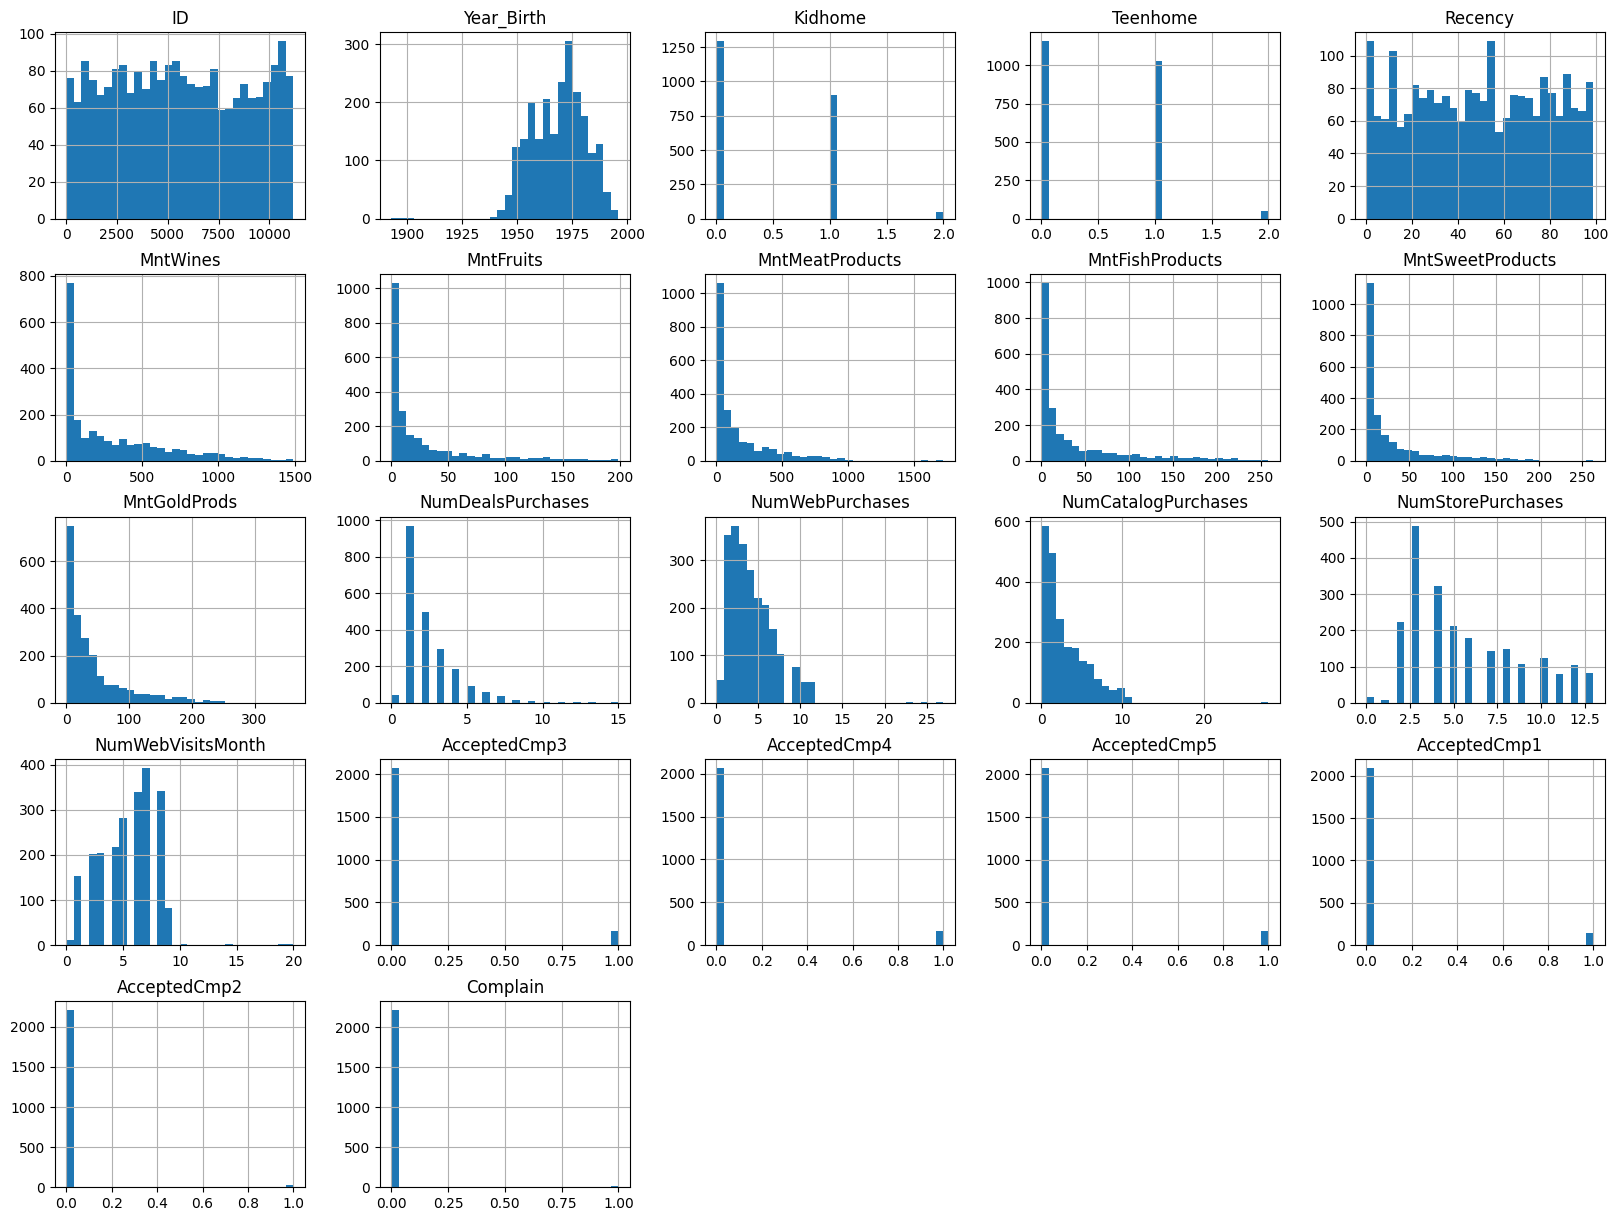

In [10]:
# Histograms for numeric columns
df.hist(bins=30, figsize=(20, 15))
plt.show()

0    84835.0
1    57091.0
2    67267.0
3    32474.0
4    21474.0
Name: Income, dtype: float64


<Axes: >

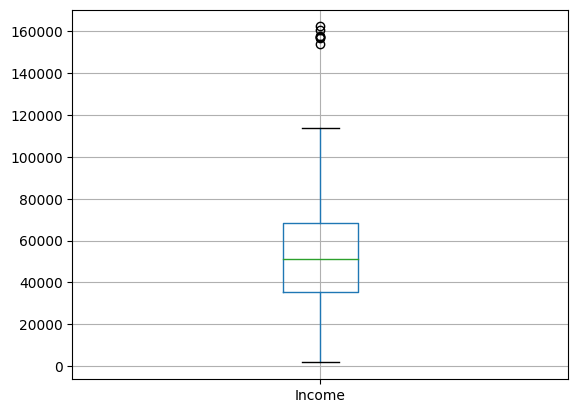

In [13]:
# Remove the dollar symbol and commas, then convert to integer
df['Income'] = df['Income'].replace('[\$,]', '', regex=True).astype(float)

# Verify the conversion
print(df['Income'].head())

# Now you can draw the boxplot
df.boxplot(column='Income')

In [15]:

cat_cols = df.dtypes =='object'
cat_cols = list(cat_cols[cat_cols].index)
cat_cols


['Education', 'Marital_Status', 'Dt_Customer', 'Country']

In [17]:

num_cols = df.dtypes !='object'
num_cols = list(num_cols[num_cols].index)
num_cols


['ID',
 'Year_Birth',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain']

In [20]:
# Correlation matrix
correlation_matrix = df[num_cols].corr()
correlation_matrix

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
ID,1.000000,-0.000334,0.000064,0.001861,-0.002090,-0.046070,-0.022426,0.004765,-0.004090,-0.024198,...,-0.018724,-0.003141,-0.014480,-0.007598,-0.035904,-0.025245,-0.007371,-0.021483,-0.015004,0.033945
Year_Birth,-0.000334,1.000000,-0.198064,0.229939,-0.351932,-0.019601,-0.157548,-0.017825,-0.030677,-0.041467,...,-0.144941,-0.121122,-0.128044,0.121068,0.061868,-0.060430,0.007209,-0.005851,-0.006504,-0.030101
Income,0.000064,-0.198064,1.000000,-0.514935,0.034363,0.006945,0.688269,0.507959,0.692465,0.520351,...,0.458812,0.696541,0.630397,-0.650564,-0.015286,0.219337,0.396571,0.327167,0.103909,-0.030583
Kidhome,0.001861,0.229939,-0.514935,1.000000,-0.035720,0.009246,-0.496096,-0.372535,-0.436972,-0.387512,...,-0.361566,-0.502131,-0.499488,0.447831,0.014807,-0.161511,-0.205557,-0.172261,-0.081682,0.040261
Teenhome,-0.002090,-0.351932,0.034363,-0.035720,1.000000,0.015829,0.004484,-0.176930,-0.261510,-0.204465,...,0.155373,-0.111034,0.050357,0.135029,-0.042802,0.038777,-0.191206,-0.140228,-0.015656,0.003098
Recency,-0.046070,-0.019601,0.006945,0.009246,0.015829,1.000000,0.015716,-0.004431,0.022797,0.000861,...,-0.010886,0.024888,0.000453,-0.021335,-0.033110,0.018715,0.000016,-0.019392,-0.001829,0.013194
MntWines,-0.022426,-0.157548,0.688269,-0.496096,0.004484,0.015716,1.000000,0.389591,0.562559,0.399636,...,0.542223,0.635158,0.641980,-0.320603,0.062104,0.373246,0.472593,0.354097,0.205897,-0.039052
MntFruits,0.004765,-0.017825,0.507959,-0.372535,-0.176930,-0.004431,0.389591,1.000000,0.543078,0.594780,...,0.296697,0.487884,0.461725,-0.418360,0.014689,0.010113,0.215802,0.194719,-0.009790,-0.005180
MntMeatProducts,-0.004090,-0.030677,0.692465,-0.436972,-0.261510,0.022797,0.562559,0.543078,1.000000,0.568335,...,0.293685,0.723782,0.479531,-0.539449,0.018191,0.102840,0.373729,0.309718,0.043003,-0.023514
MntFishProducts,-0.024198,-0.041467,0.520351,-0.387512,-0.204465,0.000861,0.399636,0.594780,0.568335,1.000000,...,0.293616,0.534414,0.459753,-0.445972,0.000290,0.016776,0.199527,0.260720,0.002549,-0.020978


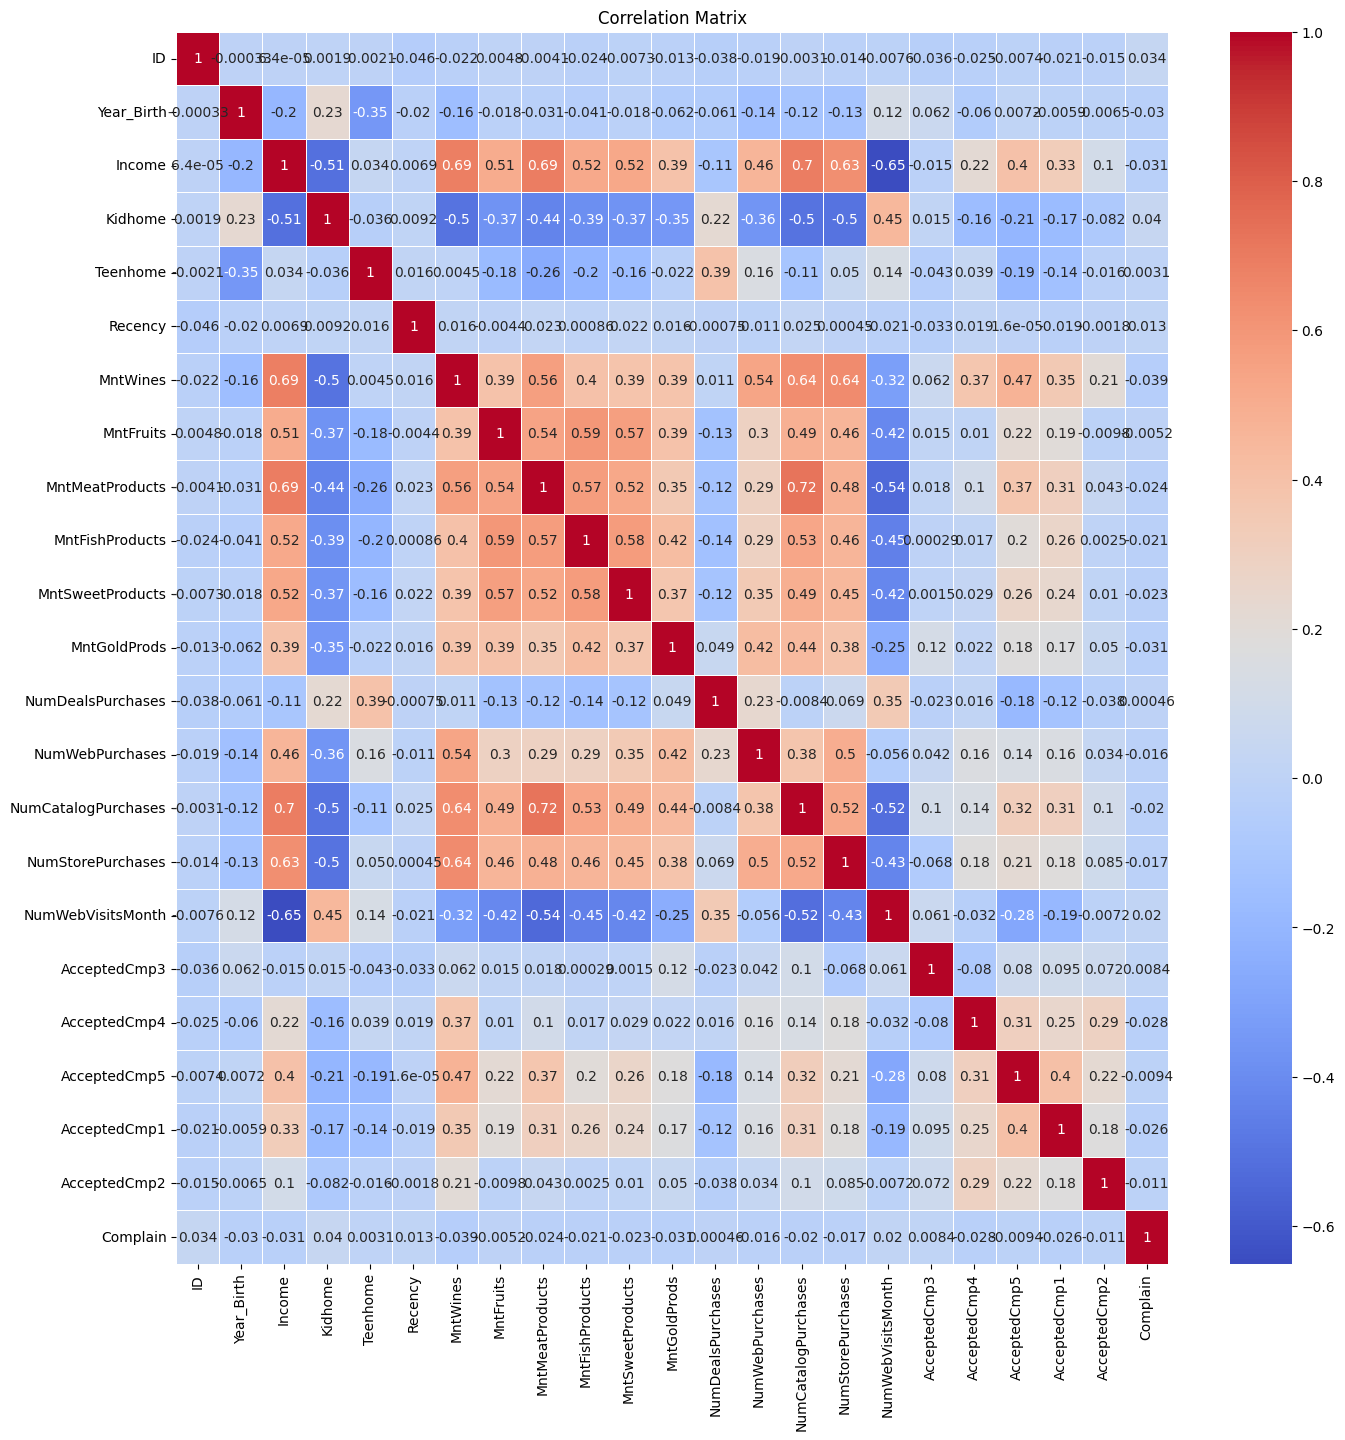

In [24]:
# Heatmap for correlation matrix
plt.figure(figsize=(16,16 ))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

b) Handling Missing Values

In [25]:
#NO MISSING VALUE IN THE DATASET
# If you want to fill missing values with the median

df['Income'].fillna(df['Income'].median(), inplace=True)

# Drop rows with any missing values (optional)
df.dropna(inplace=True)

#3. Feature Engineering

a) Income Brackets

In [26]:
# Calculate median income
median_income = df['Income'].median()

# Create income brackets
df['Income_Bracket'] = df['Income'].apply(lambda x: 'Above_Median' if x >= median_income else 'Below_Median')

In [27]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Country,Income_Bracket
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,0,SP,Above_Median
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,0,CA,Above_Median
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,US,Above_Median
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,AUS,Below_Median
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,0,SP,Below_Median
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,10142,1976,PhD,Divorced,66476.0,0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,US,Above_Median
2235,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,SP,Below_Median
2236,22,1976,Graduation,Divorced,46310.0,1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,SP,Below_Median
2237,528,1978,Graduation,Married,65819.0,0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,IND,Above_Median


b) Marital Status Reclassification

In [28]:
# Reclassify marital statuses
df['Marital_Status_Simplified'] = df['Marital_Status'].replace({
    'Married': 'In couple',
    'Together': 'In couple',
    'Divorced': 'Alone',
    'Single': 'Alone',
    'Widow': 'Alone',
    'Absurd': 'Alone',
    'YOLO': 'Alone'
})

c) Campaign Participation

In [ ]:

# Create a binary feature for campaign acceptance
df['Accepted_Campaign'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)

d) Total Spending

In [29]:
# Sum of spending across all product categories
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)


#4. Outlier Detection and Removal

a) Detecting Outliers Using Z-Score

In [30]:
from scipy import stats

# Calculate Z-scores
df['Income_Zscore'] = stats.zscore(df['Income'])

# Remove outliers (considering Z-score > 3 as an outlier)
df = df[(df['Income_Zscore'] < 3) & (df['Income_Zscore'] > -3)]

b) Detecting Outliers Using IQR

In [31]:
# Calculate IQR for Income
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
df = df[(df['Income'] >= (Q1 - 1.5 * IQR)) & (df['Income'] <= (Q3 + 1.5 * IQR))]

#5. Hypothesis Testing

a) Income vs. Education (ANOVA)

In [34]:
import scipy.stats as stats

# ANOVA test
anova_result = stats.f_oneway(
    df[df['Education'] == 'Basic']['Income'],
    df[df['Education'] == '2n Cycle']['Income'],
    df[df['Education'] == 'Graduation']['Income'],
    df[df['Education'] == 'Master']['Income'],
    df[df['Education'] == 'PhD']['Income']
)
anova_result

F_onewayResult(statistic=39.62096012546772, pvalue=4.265622323911672e-32)

b) Spending vs. Income (Correlation)

In [35]:
# Pearson correlation test
correlation, p_value = stats.pearsonr(df['Income'], df['Total_Spending'])

# Spearman correlation test (if data is non-linear or non-normal)
spearman_corr, spearman_p_value = stats.spearmanr(df['Income'], df['Total_Spending'])

c) Wine Spending: Couples vs. Alone (T-test)


In [36]:
couples_wine = df[df['Marital_Status_Simplified'] == 'In couple']['MntWines']
alone_wine = df[df['Marital_Status_Simplified'] == 'Alone']['MntWines']

t_stat, t_p_value = stats.ttest_ind(couples_wine, alone_wine)

# Mann-Whitney U test if non-normal distribution
mannwhitney_u_stat, mannwhitney_p_value = stats.mannwhitneyu(couples_wine, alone_wine)

In [38]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Country,Income_Bracket,Marital_Status_Simplified,Total_Spending,Income_Zscore
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,0,0,0,0,0,SP,Above_Median,Alone,1190,1.535630
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,0,0,0,1,0,CA,Above_Median,Alone,577,0.239539
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,0,0,0,0,0,US,Above_Median,In couple,251,0.714922
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,0,0,0,0,0,AUS,Below_Median,In couple,11,-0.910472
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,0,0,0,0,0,SP,Below_Median,Alone,91,-1.424349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,10142,1976,PhD,Divorced,66476.0,0,1,3/7/13,99,372,...,0,0,0,0,0,US,Above_Median,Alone,689,0.677969
2235,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,...,0,0,0,0,0,SP,Below_Median,In couple,55,-0.976715
2236,22,1976,Graduation,Divorced,46310.0,1,0,12/3/12,99,185,...,0,0,0,0,0,SP,Below_Median,Alone,309,-0.264108
2237,528,1978,Graduation,Married,65819.0,0,0,11/29/12,99,267,...,0,0,0,0,0,IND,Above_Median,In couple,1383,0.647277


d) Campaign Acceptance vs. Income Bracket (Chi-square test)

In [37]:
# Create a contingency table
contingency_table = pd.crosstab(df['Income_Bracket'], df['Accepted_Campaign'])

# Chi-square test of independence
chi2_stat, chi2_p_value, chi2_dof, chi2_expected = stats.chi2_contingency(contingency_table)

KeyError: 'Accepted_Campaign'